# Paper Visualizations

This notebook generates publication-ready visualizations for the research paper.

**Input Files:**
- `data/results/phase1_openjij_parameters.xlsx` - QUBO parameter optimization results
- `data/results/phase2_openjij_parameters.xlsx` - OpenJij annealing parameter optimization results
- `data/results/pipeline_experiment_results.csv` - Importance metrics comparison results

## Setup: Imports and Configuration

In [1]:
# Add project root to Python path
import sys
from pathlib import Path

project_root = Path.cwd().parent.parent
sys.path.insert(0, str(project_root))

print(f"✓ Project root: {project_root}")

✓ Project root: c:\Users\AUC\Desktop\Thesis\Quantum-Optimization-In-AP-Selection


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set publication-quality plotting defaults
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['grid.linewidth'] = 1.5
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 14

sns.set_style('whitegrid')

print("✓ All libraries imported successfully")
print("✓ Publication-quality plotting configured (DPI=300)")

✓ All libraries imported successfully
✓ Publication-quality plotting configured (DPI=300)


## Load Data

In [3]:
# Define paths
results_dir = project_root / 'data' / 'results'
phase1_file = results_dir / 'phase1_openjij_parameters.xlsx'
phase2_file = results_dir / 'phase2_openjij_parameters.xlsx'
pipeline_file = results_dir / 'pipeline_experiment_results.csv'
output_dir = results_dir / 'visualizations' / 'paper'
output_dir.mkdir(parents=True, exist_ok=True)

print("Loading benchmark results...")

# Load Phase 1 results
if not phase1_file.exists():
    raise FileNotFoundError(f"Phase 1 file not found: {phase1_file}")
phase1_df = pd.read_excel(phase1_file)
print(f"✓ Loaded Phase 1 results: {len(phase1_df)} configurations")

# Load Phase 2 results
if not phase2_file.exists():
    raise FileNotFoundError(f"Phase 2 file not found: {phase2_file}")
phase2_df = pd.read_excel(phase2_file)
print(f"✓ Loaded Phase 2 results: {len(phase2_df)} configurations")

# Load importance metrics comparison results
if not pipeline_file.exists():
    raise FileNotFoundError(f"Pipeline results file not found: {pipeline_file}")
pipeline_df = pd.read_csv(pipeline_file)
print(f"✓ Loaded pipeline results: {len(pipeline_df)} configurations")

print(f"\n✓ Output directory: {output_dir}")

Loading benchmark results...
✓ Loaded Phase 1 results: 96 configurations
✓ Loaded Phase 2 results: 144 configurations
✓ Loaded pipeline results: 5 configurations

✓ Output directory: c:\Users\AUC\Desktop\Thesis\Quantum-Optimization-In-AP-Selection\data\results\visualizations\paper


---
# Phase 1: QUBO Parameter Optimization

Clear 2-variable visualizations showing the impact of each parameter on system performance.

## Figure 1: Number of APs (k) vs Mean 3D Positioning Error

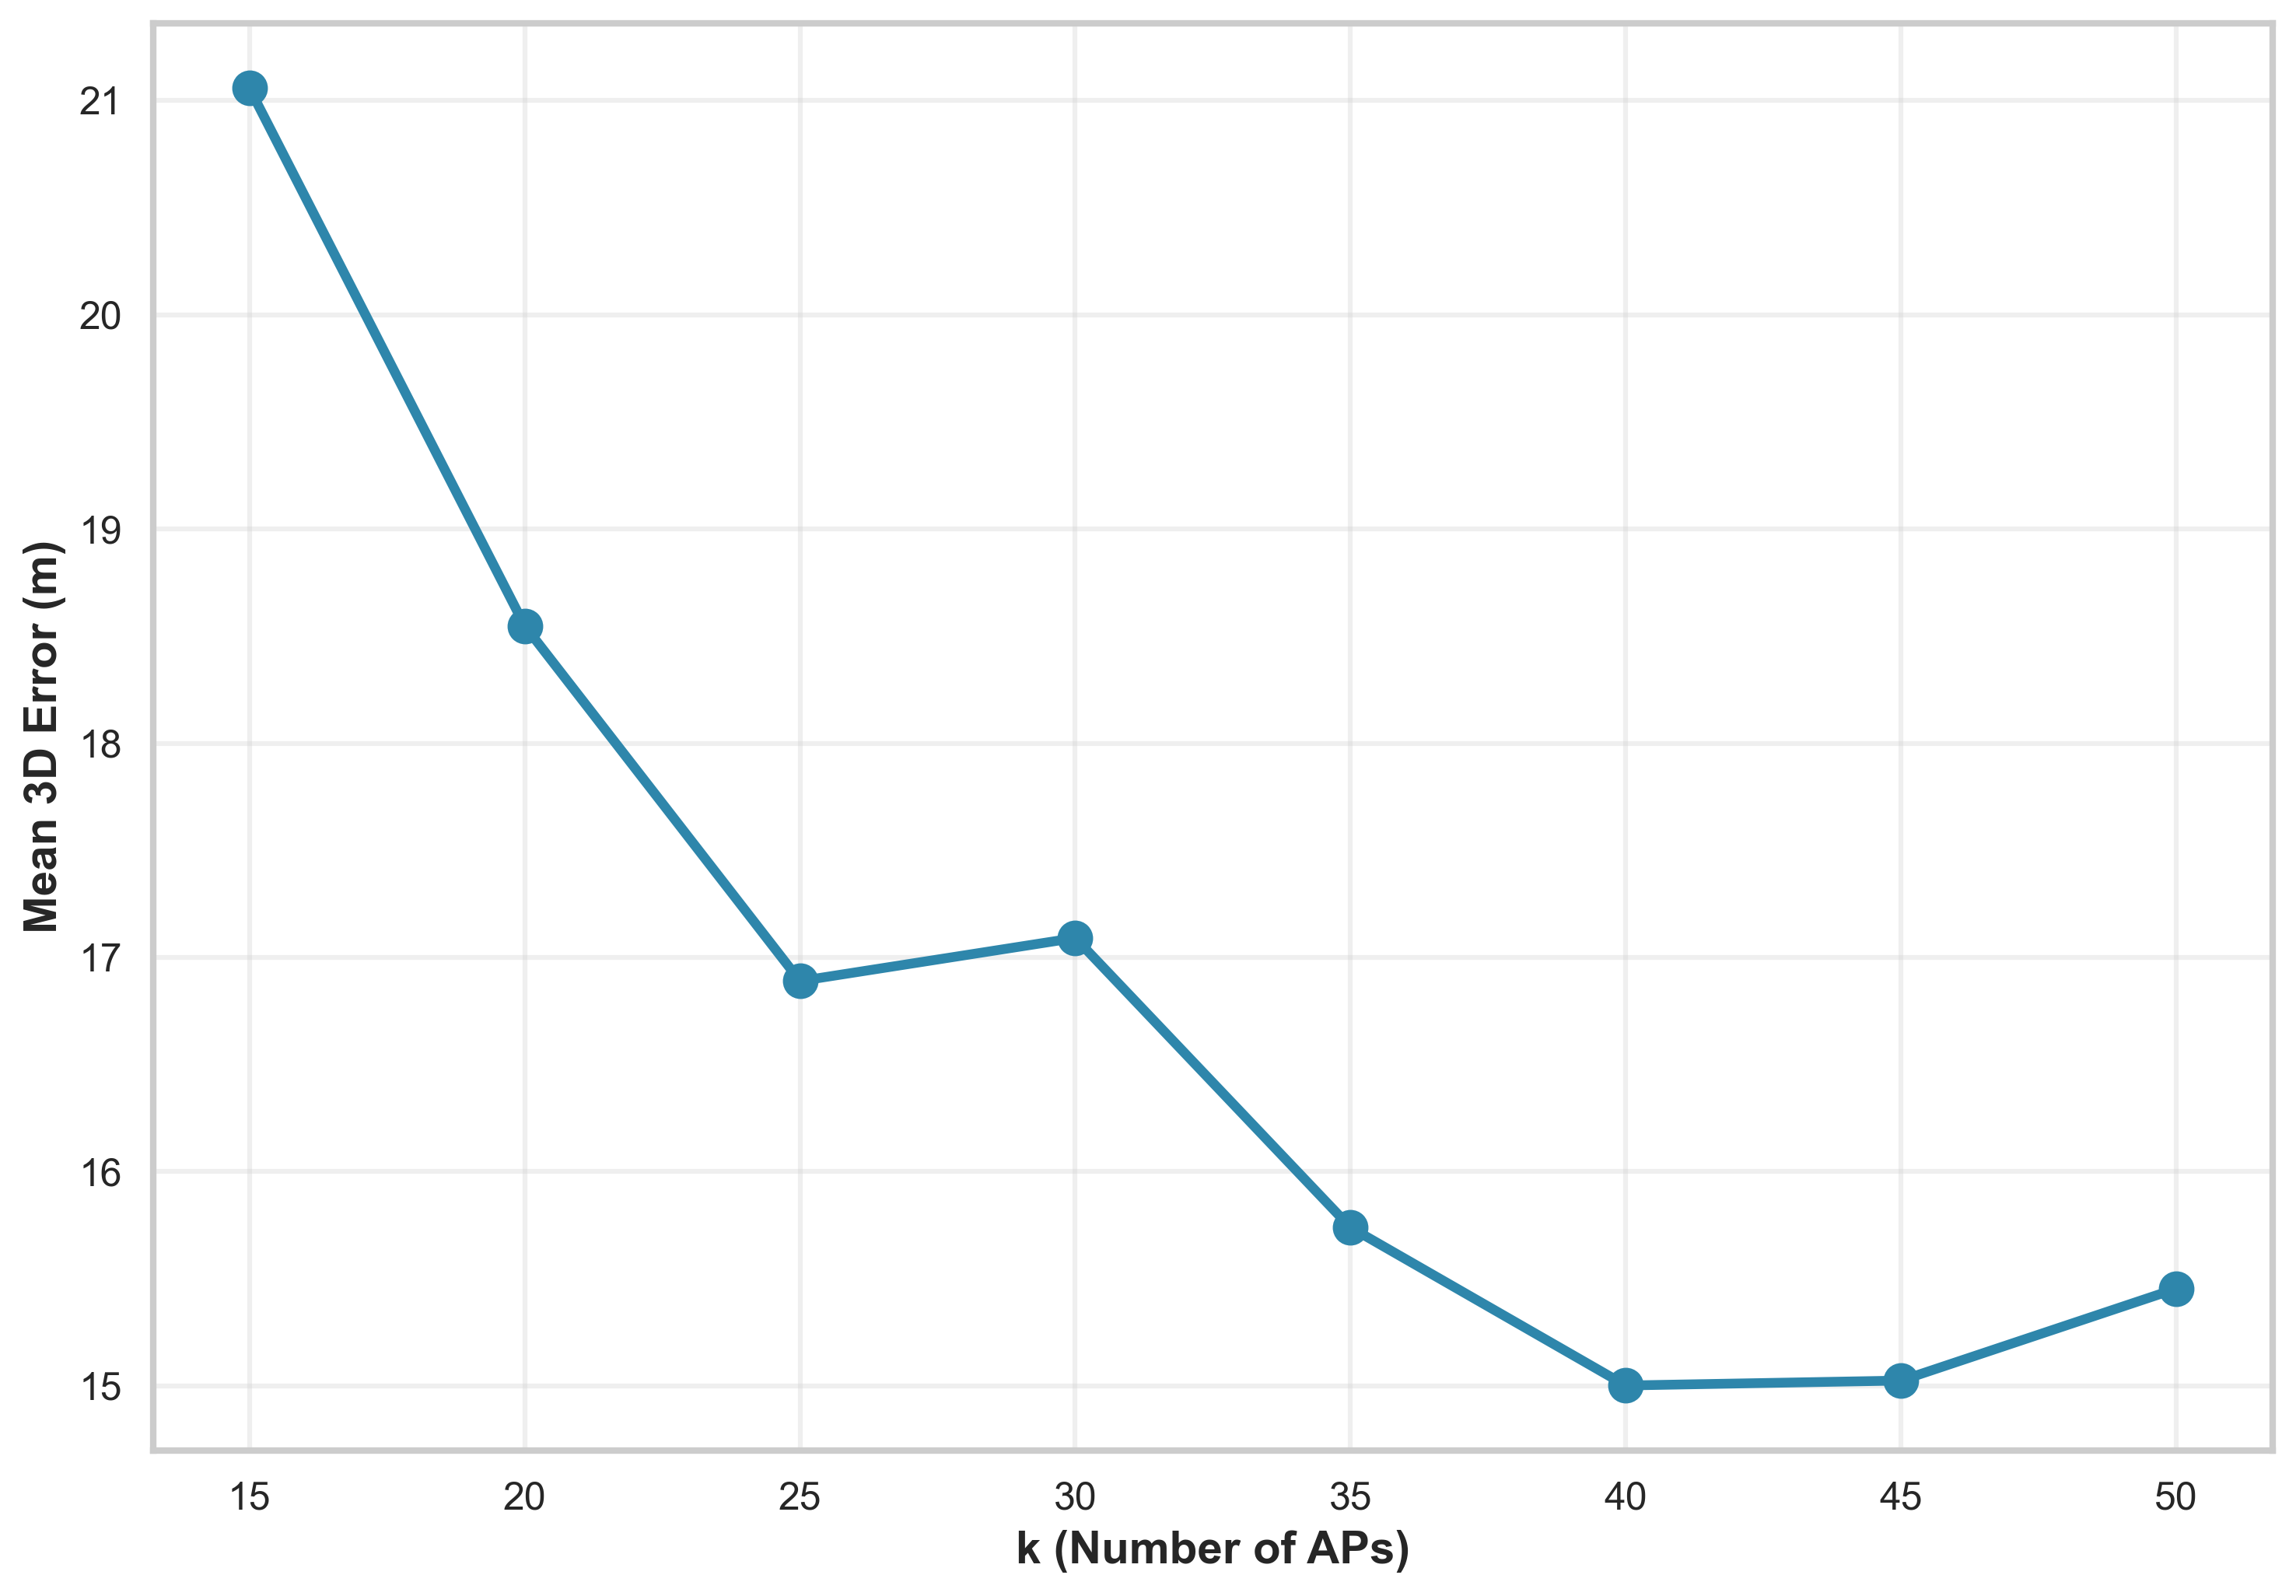

✓ Figure 1 saved: fig1_k_vs_error.png


In [24]:
fig, ax = plt.subplots(figsize=(10, 7))

# Aggregate across alpha and penalty to get single line
grouped = phase1_df.groupby('k')['mean_3d_error_m'].mean().reset_index()

ax.plot(grouped['k'], grouped['mean_3d_error_m'], 
        marker='o', linewidth=3, color='#2E86AB', markersize=10)

ax.set_xlabel('k (Number of APs)', fontsize=14, fontweight='bold')
ax.set_ylabel('Mean 3D Error (m)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'fig1_k_vs_error.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 1 saved: fig1_k_vs_error.png")

## Figure 2: Number of APs (k) vs Floor Accuracy

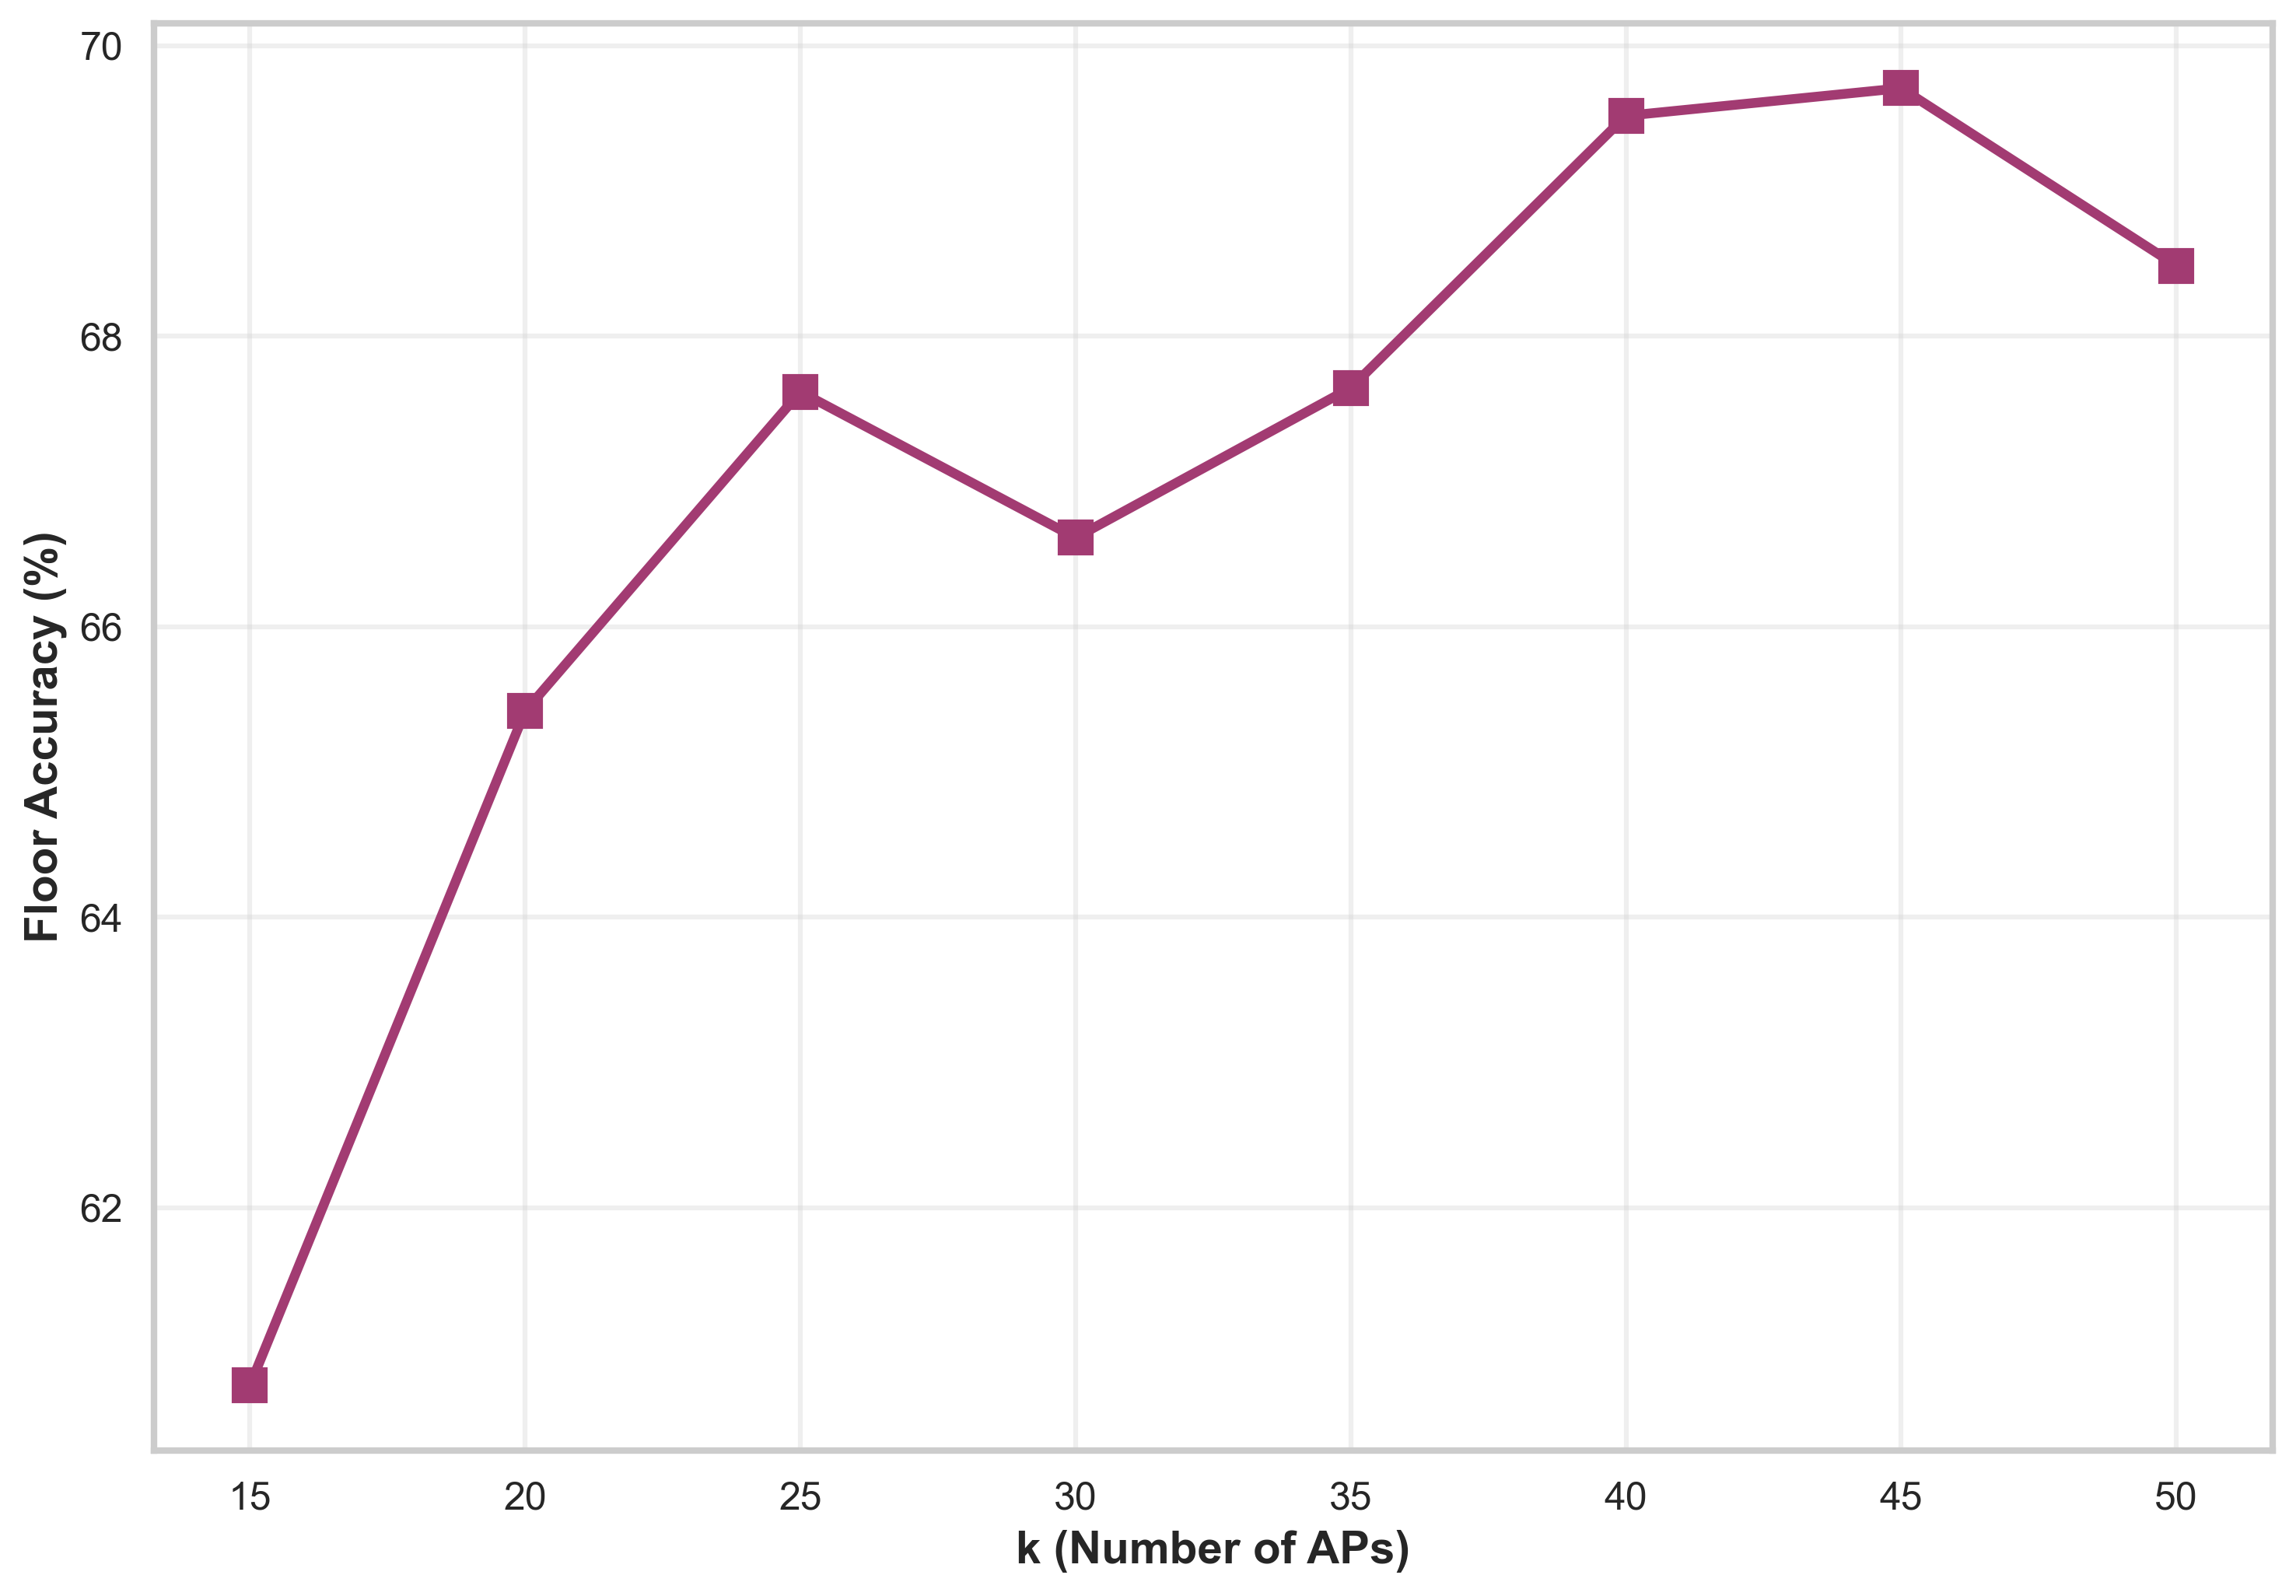

✓ Figure 2 saved: k_vs_floor_acc.png


In [25]:
fig, ax = plt.subplots(figsize=(10, 7))

# Aggregate across alpha and penalty
grouped = phase1_df.groupby('k')['floor_accuracy_0'].mean().reset_index()
grouped['floor_accuracy_pct'] = grouped['floor_accuracy_0'] * 100

ax.plot(grouped['k'], grouped['floor_accuracy_pct'], 
        marker='s', linewidth=3, color='#A23B72', markersize=10)

ax.set_xlabel('k (Number of APs)', fontsize=14, fontweight='bold')
ax.set_ylabel('Floor Accuracy (%)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'k_vs_floor_acc.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 2 saved: k_vs_floor_acc.png")

## Figure 3: Alpha (Importance Threshold) vs Mean 3D Error

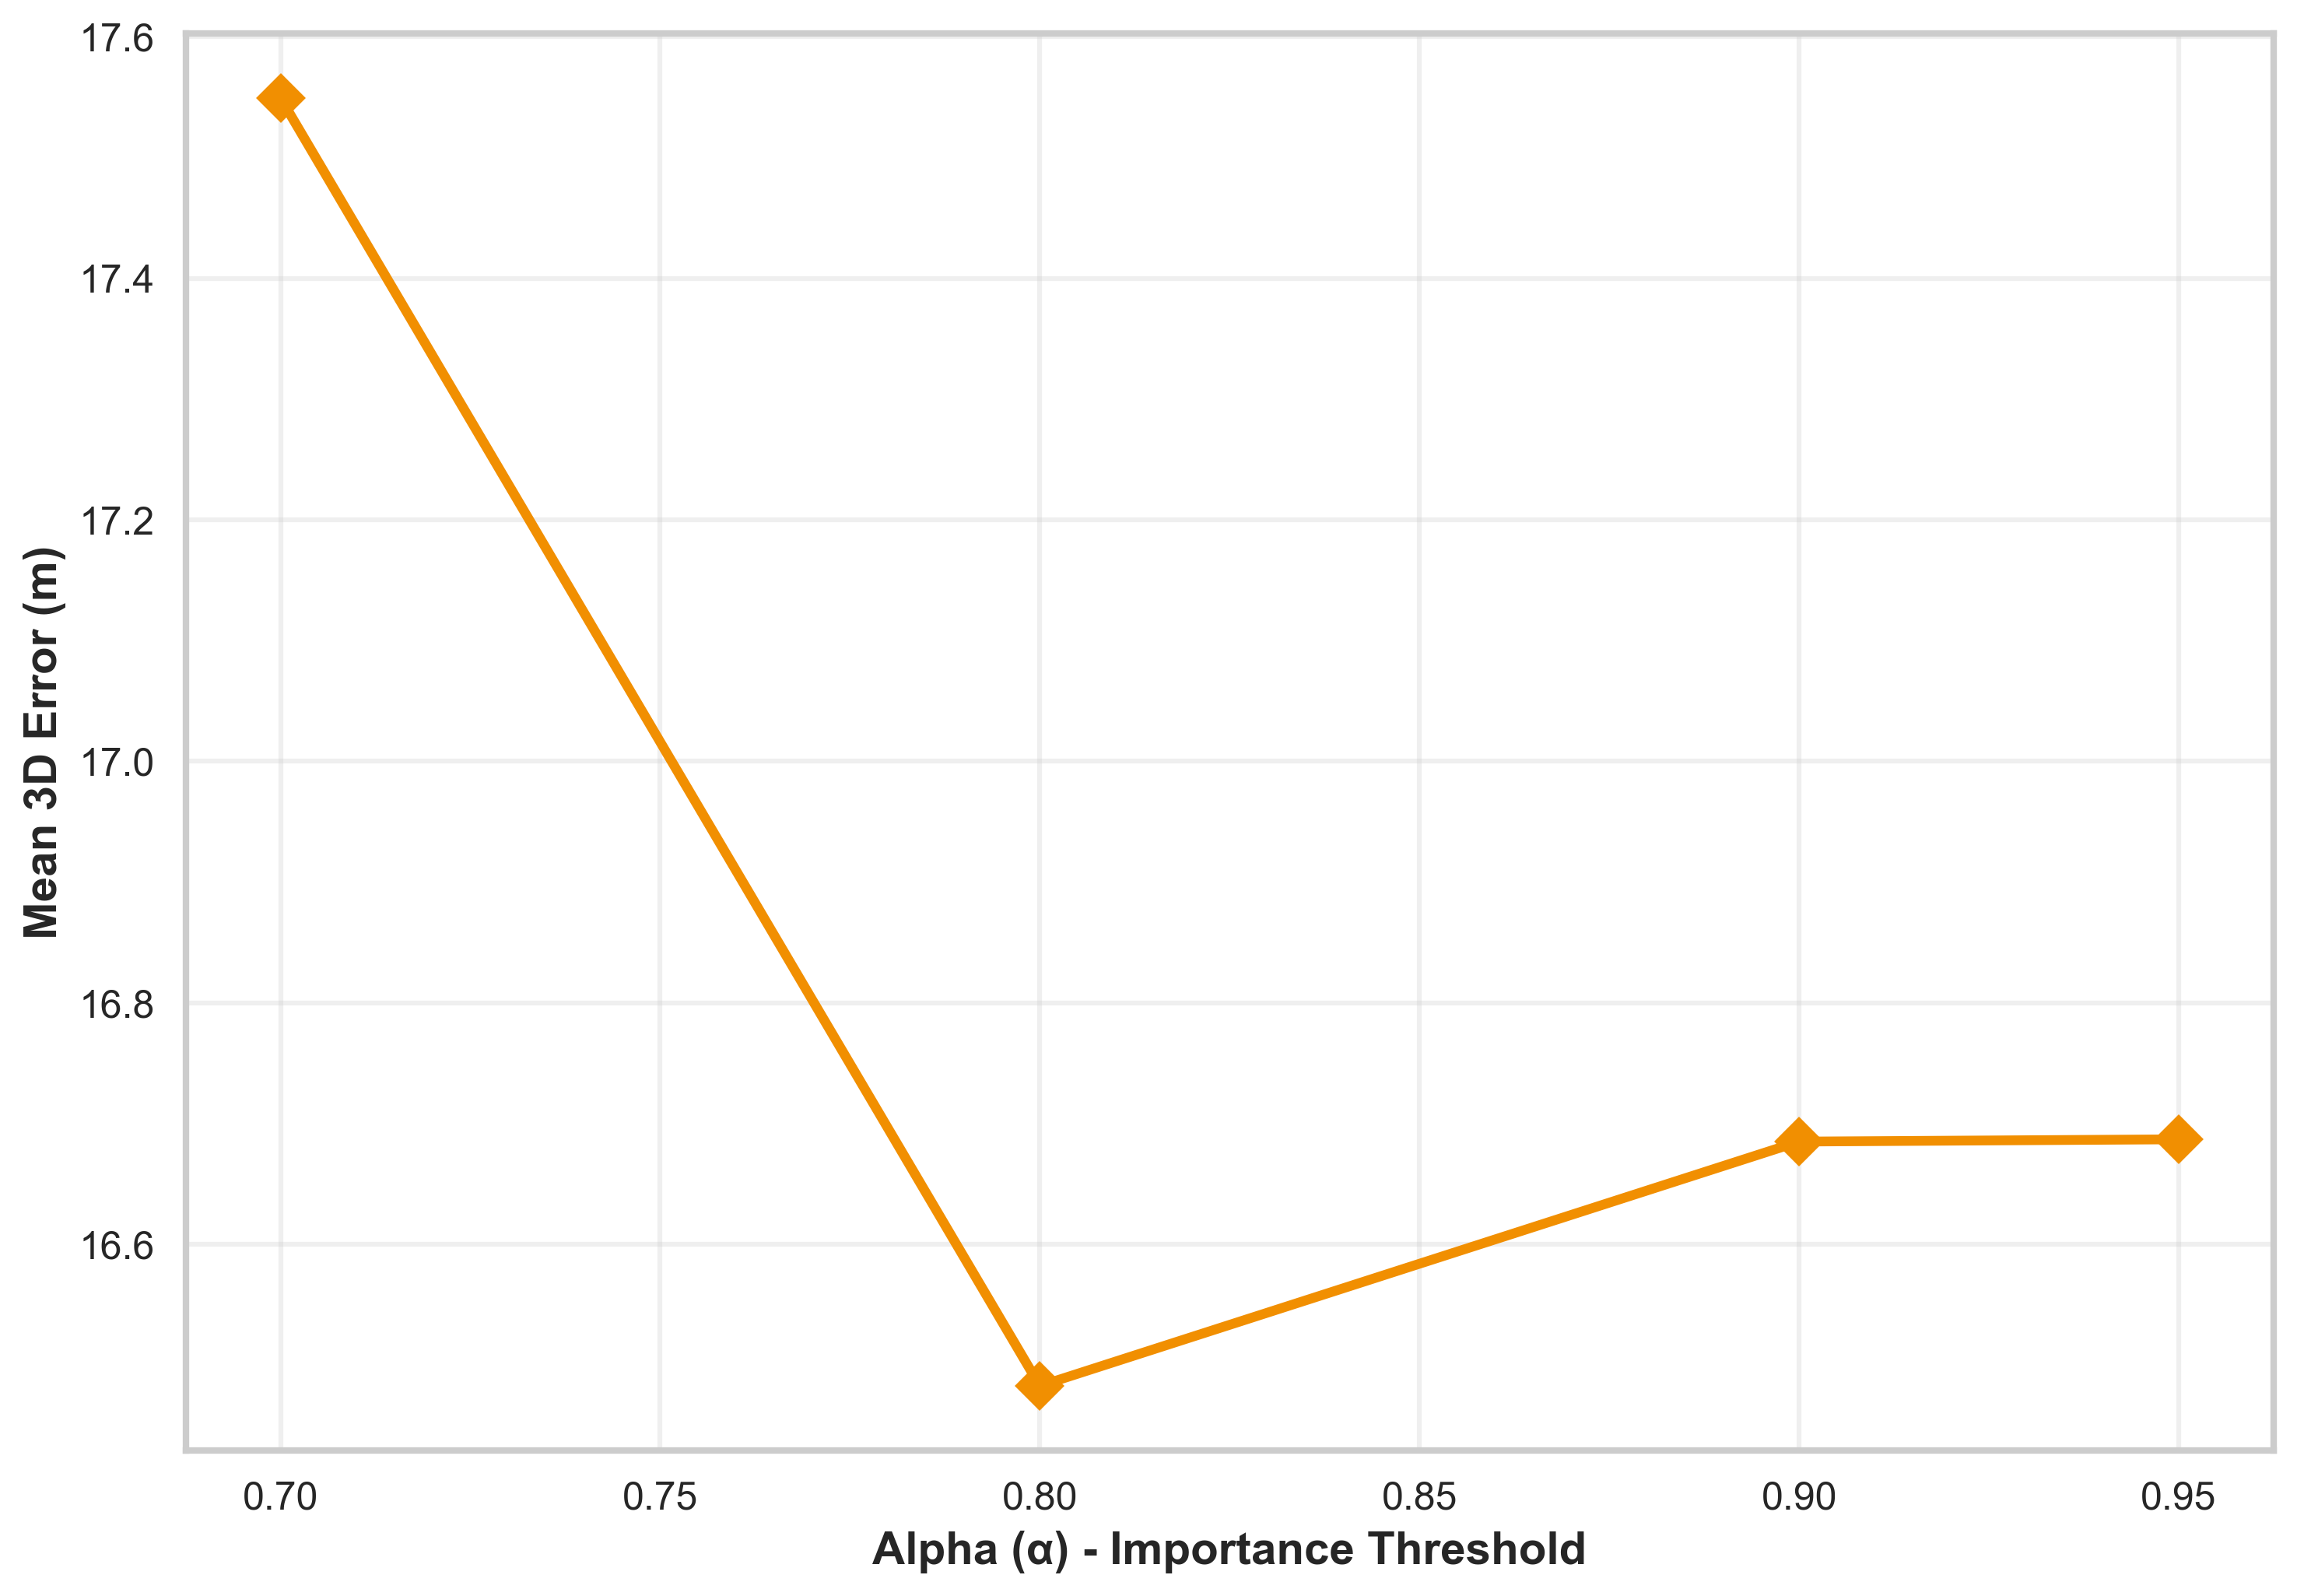

✓ Figure 3 saved: alpha_vs_error.png


In [26]:
fig, ax = plt.subplots(figsize=(10, 7))

# Aggregate across k and penalty
grouped = phase1_df.groupby('alpha')['mean_3d_error_m'].mean().reset_index()

ax.plot(grouped['alpha'], grouped['mean_3d_error_m'], 
        marker='D', linewidth=3, color='#F18F01', markersize=10)

ax.set_xlabel('Alpha (α) - Importance Threshold', fontsize=14, fontweight='bold')
ax.set_ylabel('Mean 3D Error (m)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'alpha_vs_error.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 3 saved: alpha_vs_error.png")

## Figure 4: Penalty Weight vs Floor Accuracy

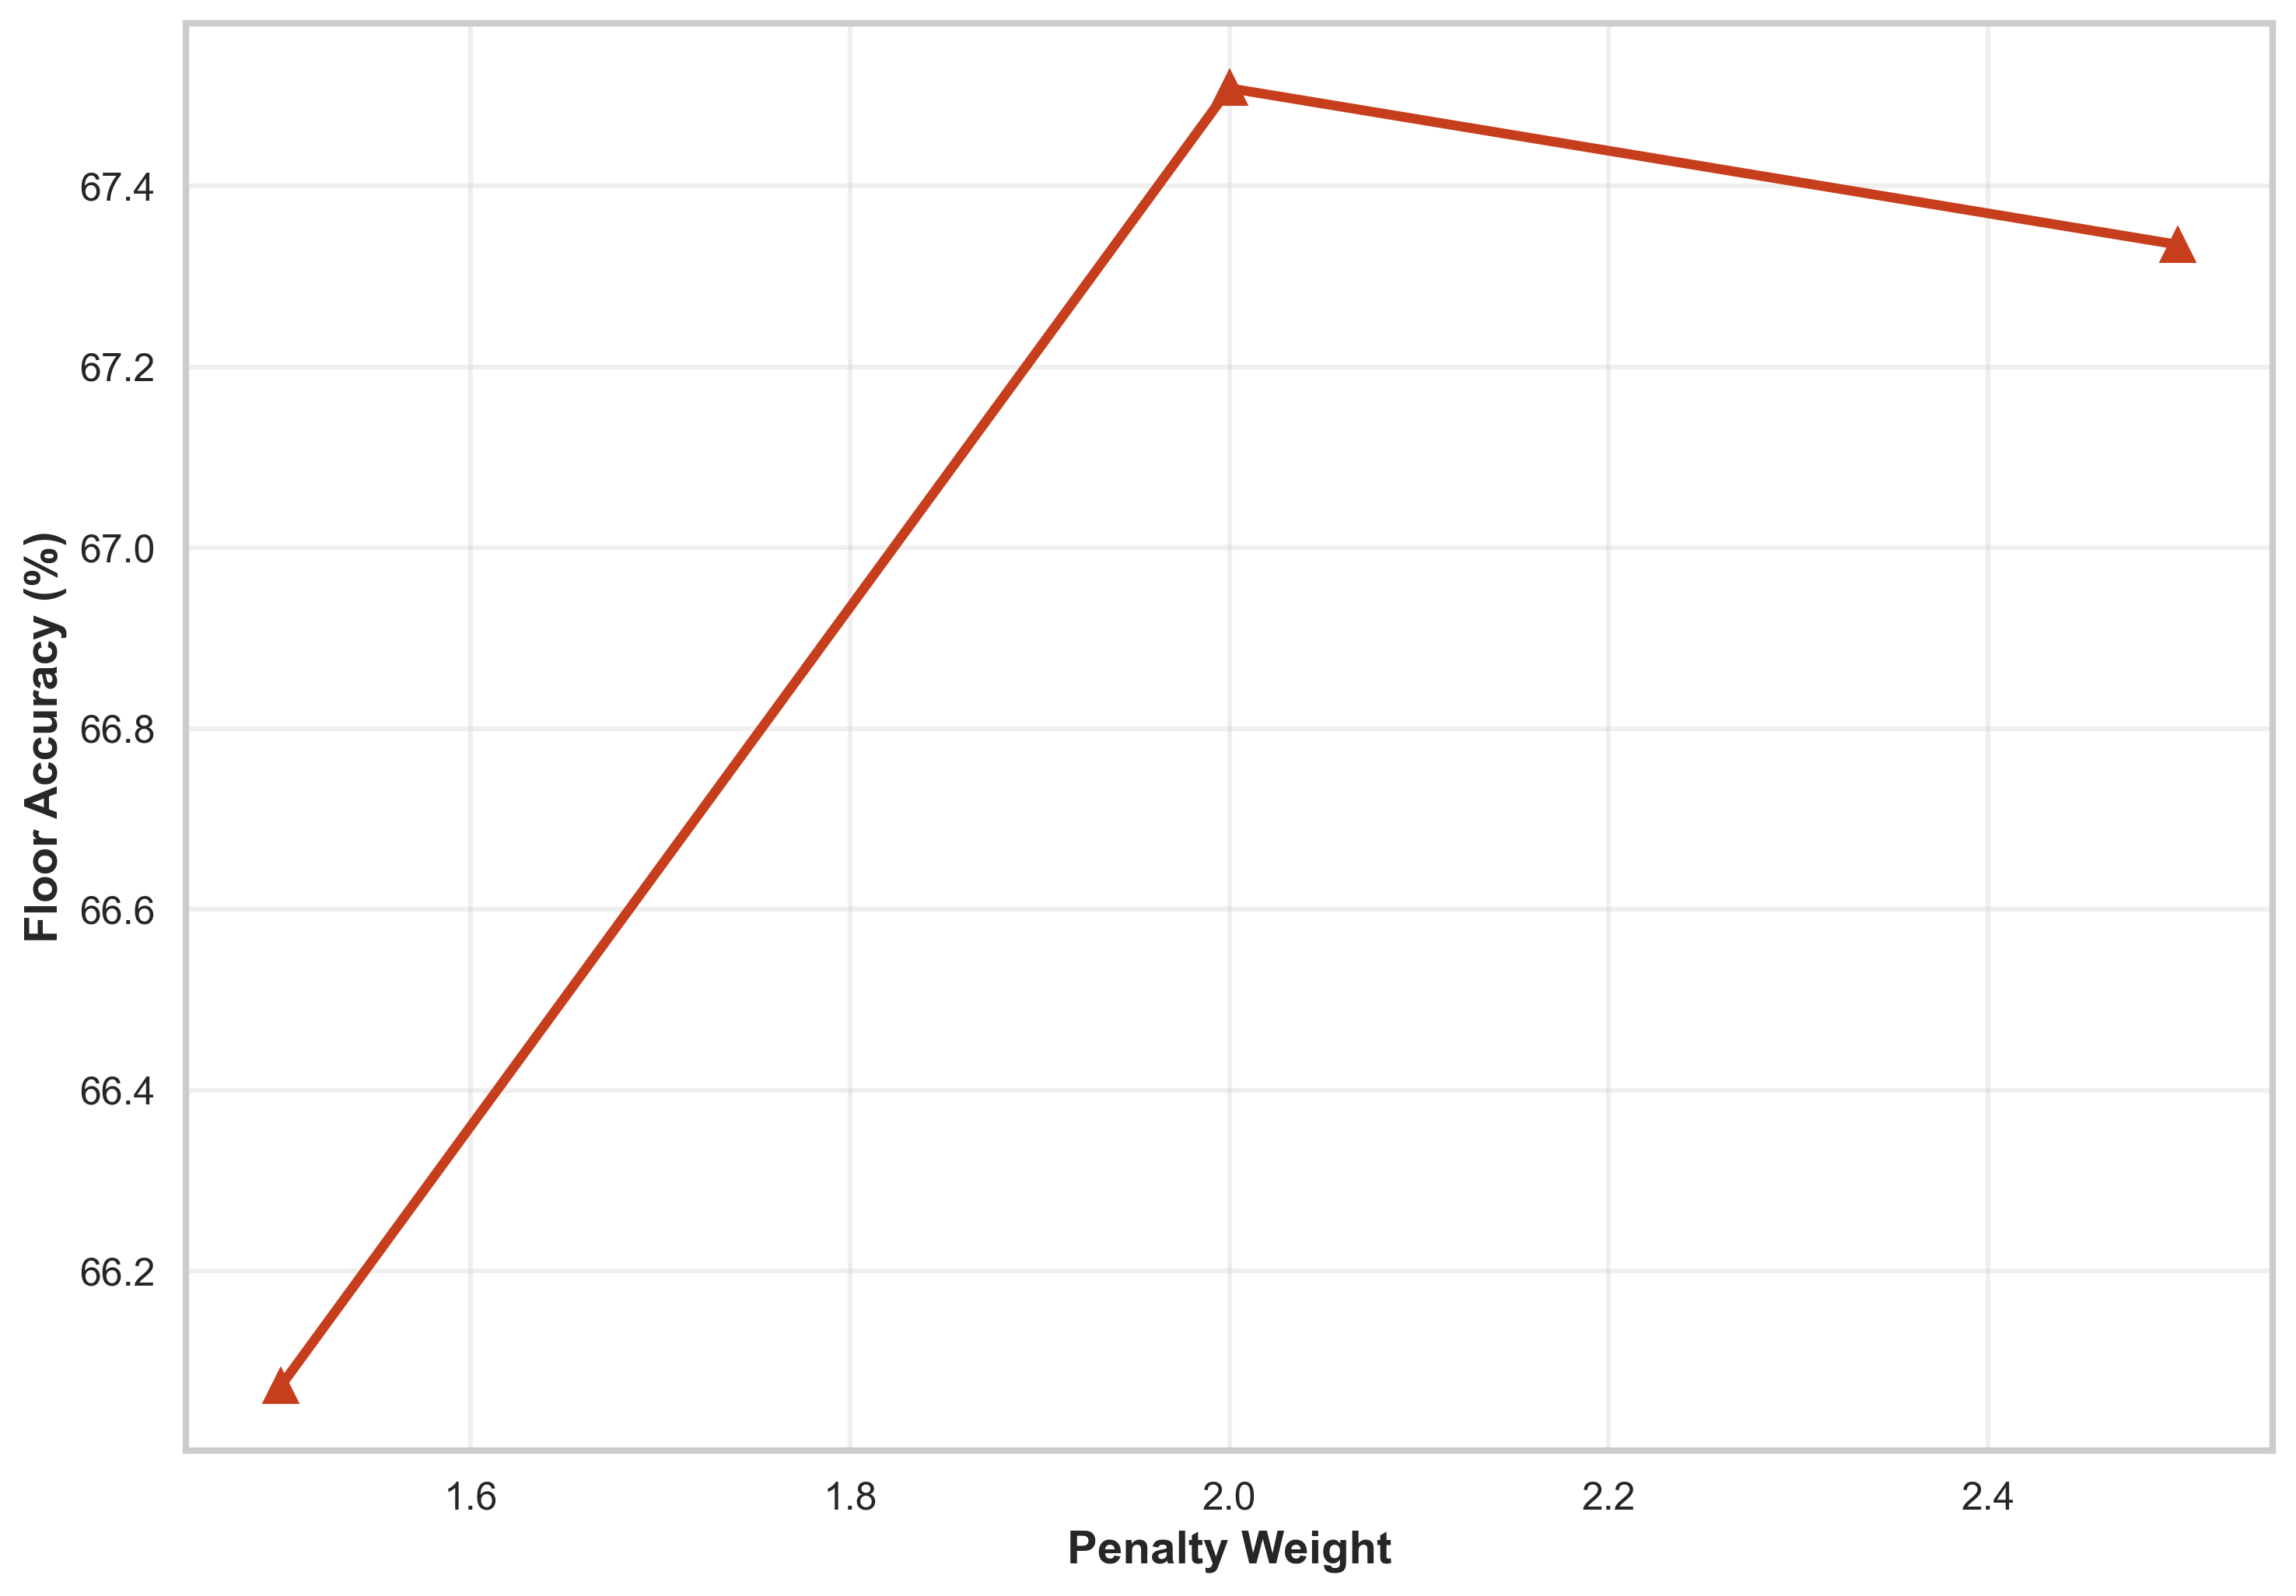

✓ Figure 4 saved: penalty_vs_floor_acc.png


In [27]:
fig, ax = plt.subplots(figsize=(10, 7))

# Aggregate across k and alpha
grouped = phase1_df.groupby('penalty')['floor_accuracy_0'].mean().reset_index()
grouped['floor_accuracy_pct'] = grouped['floor_accuracy_0'] * 100

ax.plot(grouped['penalty'], grouped['floor_accuracy_pct'], 
        marker='^', linewidth=3, color='#C73E1D', markersize=10)

ax.set_xlabel('Penalty Weight', fontsize=14, fontweight='bold')
ax.set_ylabel('Floor Accuracy (%)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'penalty_vs_floor_acc.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 4 saved: penalty_vs_floor_acc.png")

---
# Phase 2: OpenJij Annealing Parameter Optimization

Impact of quantum annealing parameters on performance and efficiency.

## Figure 5: Number of Sweeps vs Time-to-Solution (TTS)

NameError: name 'phase2_finite' is not defined

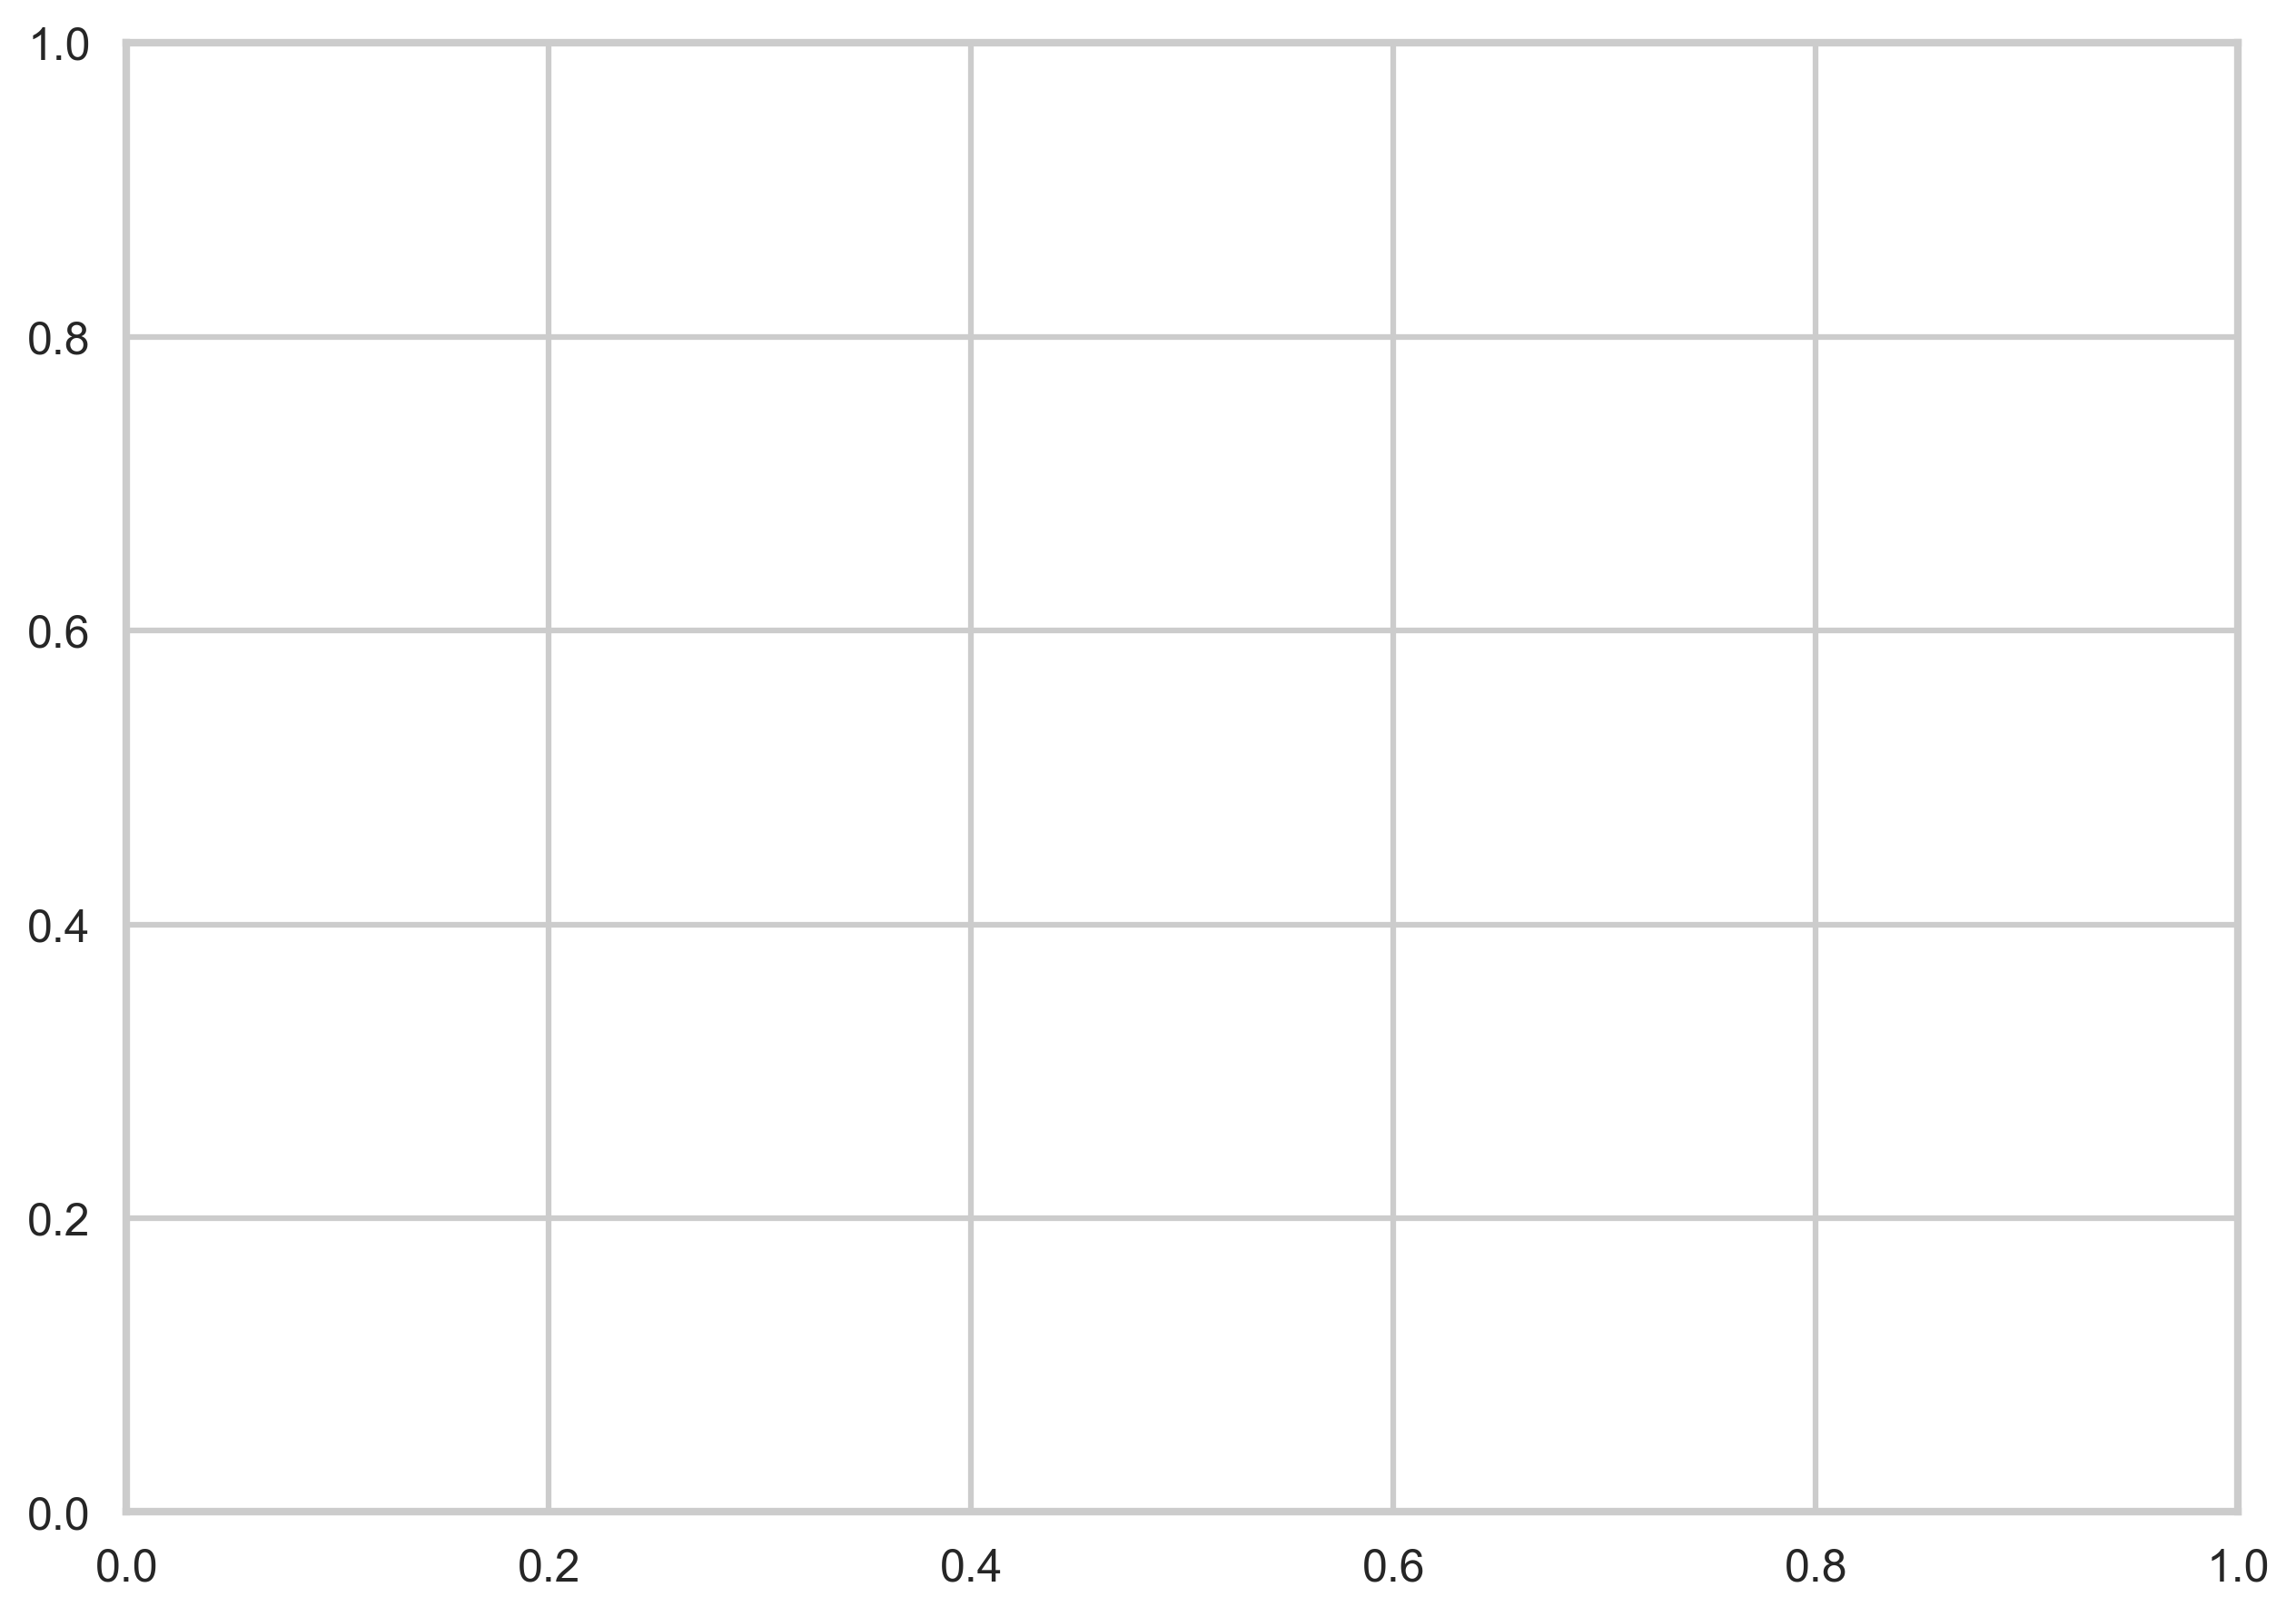

In [28]:
fig, ax = plt.subplots(figsize=(10, 7))

# Aggregate across all other parameters
grouped = phase2_finite.groupby('num_sweeps')['tts_s'].mean().reset_index()

ax.plot(grouped['num_sweeps'], grouped['tts_s'], 
        marker='o', linewidth=3, color='#2E86AB', markersize=10)

ax.set_xlabel('Number of Sweeps', fontsize=14, fontweight='bold')
ax.set_ylabel('Time-to-Solution (s)', fontsize=14, fontweight='bold')
ax.set_yscale('log')
ax.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.savefig(output_dir / 'sweeps_vs_tts.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 5 saved: sweeps_vs_tts.png")

## Figure 6: Number of Reads vs Success Rate

NameError: name 'phase2_finite' is not defined

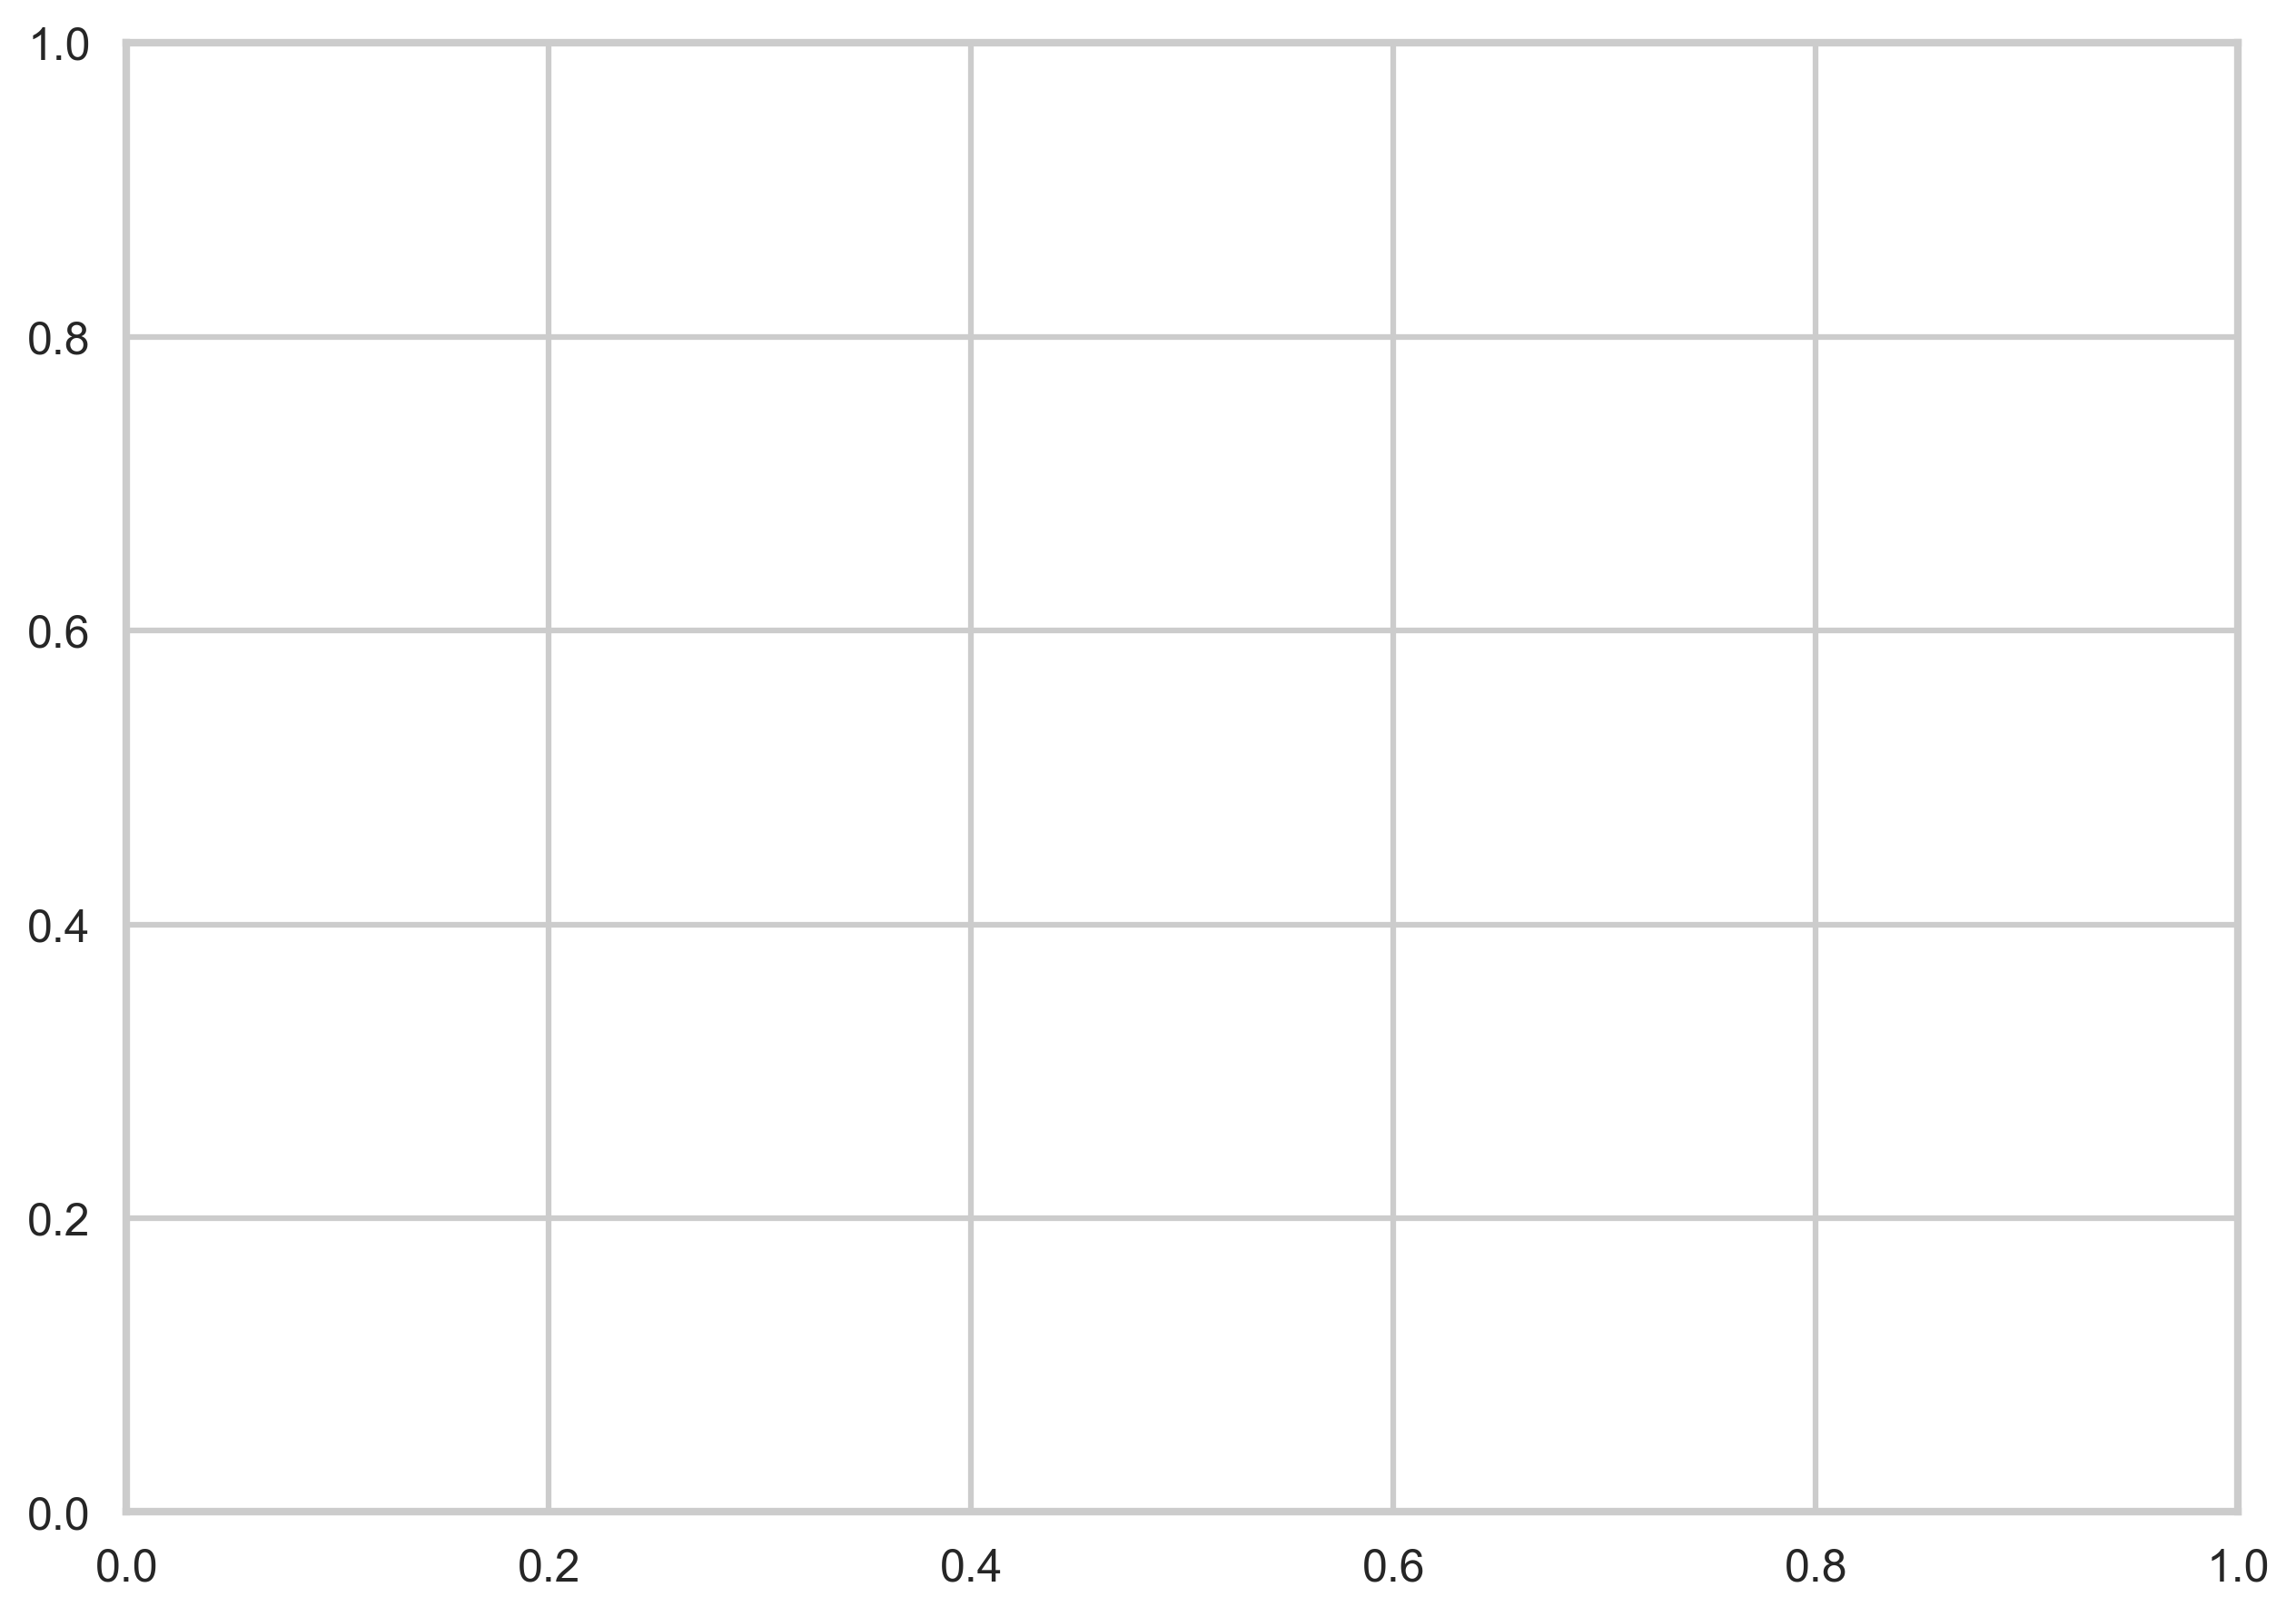

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

# Aggregate across all other parameters
grouped = phase2_finite.groupby('num_reads')['success_rate'].mean().reset_index()

ax.plot(grouped['num_reads'], grouped['success_rate'], 
        marker='s', linewidth=3, color='#A23B72', markersize=10)

ax.set_xlabel('Number of Reads', fontsize=14, fontweight='bold')
ax.set_ylabel('Success Rate', fontsize=14, fontweight='bold')
ax.set_ylim([0, 1])
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'reads_vs_success.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 6 saved: reads_vs_success.png")

## Figure 7: Beta (Inverse Temperature) vs Mean 3D Error

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

# Aggregate across all other parameters
grouped = phase2_finite.groupby('beta')['mean_3d_error_m'].mean().reset_index()

ax.plot(grouped['beta'], grouped['mean_3d_error_m'], 
        marker='D', linewidth=3, color='#F18F01', markersize=10)

ax.set_xlabel('Beta (β) - Inverse Temperature', fontsize=14, fontweight='bold')
ax.set_ylabel('Mean 3D Error (m)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'beta_vs_error.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 7 saved: beta_vs_error.png")

## Figure 8: Gamma (Transverse Field) vs Floor Accuracy

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

# Aggregate across all other parameters
grouped = phase2_finite.groupby('gamma')['floor_accuracy_0'].mean().reset_index()
grouped['floor_accuracy_pct'] = grouped['floor_accuracy_0'] * 100

ax.plot(grouped['gamma'], grouped['floor_accuracy_pct'], 
        marker='^', linewidth=3, color='#C73E1D', markersize=10)

ax.set_xlabel('Gamma (γ) - Transverse Field', fontsize=14, fontweight='bold')
ax.set_ylabel('Floor Accuracy (%)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'gamma_vs_floor_acc.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 8 saved: gamma_vs_floor_acc.png")

---
# Importance Metrics Comparison

Comparison of AP selection methods for k=20.

## Figure 9: Importance Method vs Median 3D Error

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
bars = ax.bar(k20_df['Importance_Method'], k20_df['Median_3D_Error_m'], 
              color=colors, edgecolor='black', linewidth=2, alpha=0.8)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_xlabel('Importance Method', fontsize=14, fontweight='bold')
ax.set_ylabel('Median 3D Error (m)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(output_dir / 'method_vs_error.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 9 saved: method_vs_error.png")

## Figure 10: Importance Method vs Floor Accuracy

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
bars = ax.bar(k20_df['Importance_Method'], k20_df['Floor_Accuracy_Exact_Pct'], 
              color=colors, edgecolor='black', linewidth=2, alpha=0.8)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_xlabel('Importance Method', fontsize=14, fontweight='bold')
ax.set_ylabel('Floor Accuracy (%)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(output_dir / 'method_vs_floor_acc.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 10 saved: method_vs_floor_acc.png")

---
## Summary

In [ ]:
print("="*80)
print("PAPER VISUALIZATION GENERATION COMPLETE")
print("="*80)
print(f"\nAll figures saved to: {output_dir}")
print(f"  Resolution: 300 DPI")
print(f"  Format: PNG (publication-ready)")
print("="*80)